### Library import

In [46]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Data Load

In [47]:
csv_path = "/home/miserver10/workspace_vscode/datasets/data_/winter/*.csv"

csv_files = glob.glob(csv_path)

df_list = [pd.read_csv(csv_file) for csv_file in csv_files]
df = pd.concat(df_list, ignore_index=True)  #ignore_index = 기존 인덱스 무시하여 새로운 인덱스 생성(연속으로 이어진다)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212527 entries, 0 to 212526
Data columns (total 54 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   Front_Seat_LH_Temp Unit: Degree ('c)     212527 non-null  float64
 1   Front_Seat_RH_Temp Unit: Degree('c)      212527 non-null  float64
 2   Rear_Seat_CT_Temp Unit: Degree('c)       212527 non-null  float64
 3   Front_Roof_CT_Temp Unit: Degree('c)      212527 non-null  float64
 4   Front_Roof_LH_Temp Unit: Degree('c)      212527 non-null  float64
 5   Front_Roof_RH_Temp Unit: Degree('c)      212527 non-null  float64
 6   Rear_Roof_LH_Temp Unit: Degree('c)       212527 non-null  float64
 7   Rear_Roof_RH_Temp Unit: Degree('c)       212527 non-null  float64
 8   DRV_LH_Vent_Wind_Velocity Unit: m / s    212527 non-null  float64
 9   DRV_RH_Vent_Wind_Velocity Unit: m / s    212527 non-null  float64
 10  DRV_Foot_Vent_Wind_Velocity Unit

### Data EDA

##### 1. rename

In [48]:
df.rename(columns={ 'DRV_LH_Vent_Wind_Velocity Unit: m / s' : '운전석 좌측 방향', 'DRV_RH_Vent_Wind_Velocity Unit: m / s' : '운전석 우측 방향',
                    'DRV_Foot_Vent_Wind_Velocity Unit: m / s' : '운전석 발 방향', 'DRV_Seat_Vent_Wind_Velocity Unit: m / s' : '운전석 좌석 방향',
                    'PAS_LH_Vent_Wind_Velocity Unit: m / s' : '조수석 좌측 방향', 'PAS_RH_Vent_Wind_Velocity Unit: m / s' : '조수석 우측 방향',
                    'PAS_Foot_Vent_Wind_Velocity Unit: m / s' : '조수석 발 방향', 'PAS_Seat_Vent_Wind_Velocity Unit: m / s' : '조수석 좌석 방향', 
                    'CR_Datc_IncarSnsTemp_C': '내부 온도', "Front_Seat_LH_Temp Unit: Degree ('c)" : '운전석 온도', 
                    "Front_Seat_RH_Temp Unit: Degree('c)" : '보조석 온도', 'CR_Datc_Humidity' : '습도',
                    "Rear_Seat_CT_Temp Unit: Degree('c)" : '뒷자석 온도(중앙)', "Front_Roof_CT_Temp Unit: Degree('c)" : '앞 루프 중앙',
                    "Front_Roof_LH_Temp Unit: Degree('c)": '앞 루프 좌측', "Front_Roof_RH_Temp Unit: Degree('c)" : '앞 루프 우측',
                    "Rear_Roof_LH_Temp Unit: Degree('c)": '뒷 루프 좌측', "Rear_Roof_RH_Temp Unit: Degree('c)": '뒷 루프 우측'}, inplace=True)

##### 2. describe

In [49]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
운전석 온도,212527.0,20.677391,3.722565,1.90,18.800000,20.900000,22.80000,32.10000
보조석 온도,212527.0,20.479662,3.810689,3.30,18.400000,20.700000,23.00000,32.30000
뒷자석 온도(중앙),212527.0,19.776010,3.250638,4.00,18.100000,19.900000,21.90000,29.20000
앞 루프 중앙,212527.0,22.654780,2.874444,6.70,20.900000,22.900000,24.40000,37.60000
앞 루프 좌측,212527.0,23.055489,3.042934,7.90,21.200000,23.000000,25.00000,38.80000
앞 루프 우측,212527.0,22.267195,3.011663,7.50,20.300000,22.500000,24.20000,36.60000
뒷 루프 좌측,212527.0,21.904760,3.044440,6.50,20.100000,22.100000,23.80000,40.80000
뒷 루프 우측,212527.0,22.196550,2.992331,7.00,20.200000,22.500000,24.20000,36.80000
운전석 좌측 방향,212527.0,1.429486,0.977550,0.00,0.660000,1.250000,2.13000,5.27000
운전석 우측 방향,212527.0,0.928007,0.977677,0.00,0.000000,0.900000,1.65000,6.06000


##### 온도의 분포를 확인해보니. 체감온도를 구할 수 있는 10도 이하의 온도가 별로 없을 것 같아 히스토그램으로 확인

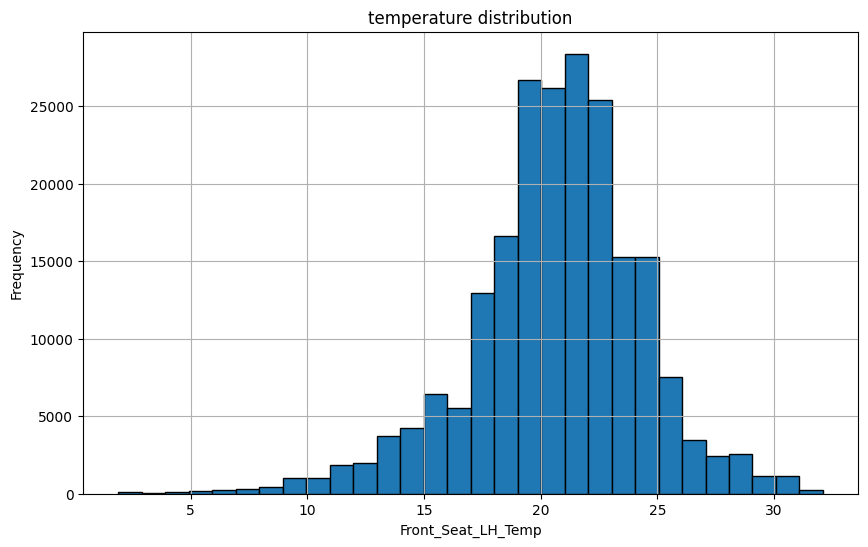

In [50]:
# 열의 분포를 히스토그램으로 시각화
plt.figure(figsize=(10, 6))
plt.hist(df['운전석 온도'], bins=30, edgecolor='k')
plt.xlabel('Front_Seat_LH_Temp')
plt.ylabel('Frequency')
plt.title('temperature distribution')
plt.grid(True)
plt.show()

##### 따라서, 불쾌지수로 동일하게 측정

### 불쾌지수 측정을 위한 새로운 data frame 생성

In [51]:
df_winter = df[['운전석 온도', '습도']]

df_winter['RH'] = df_winter['습도'] / 100.0

df_winter['불쾌지수'] = 1.8 * df_winter['운전석 온도'] - 0.55 * (1 - df_winter['RH']) * (1.8 * df_winter['운전석 온도'] - 26) + 32

/tmp/ipykernel_79751/69070479.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_winter['RH'] = df_winter['습도'] / 100.0
/tmp/ipykernel_79751/69070479.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_winter['불쾌지수'] = 1.8 * df_winter['운전석 온도'] - 0.55 * (1 - df_winter['RH']) * (1.8 * df_winter['운전석 온도'] - 26) + 32


In [52]:
df_winter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212527 entries, 0 to 212526
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   운전석 온도  212527 non-null  float64
 1   습도      212527 non-null  float64
 2   RH      212527 non-null  float64
 3   불쾌지수    212527 non-null  float64
dtypes: float64(4)
memory usage: 6.5 MB


In [53]:
df_winter.describe().T

,count,mean,std,min,25%,50%,75%,max
운전석 온도,212527.0,20.677391,3.722565,1.90000,18.800000,20.900000,22.80000,32.100000
습도,212527.0,47.574301,14.126057,0.00000,37.000000,46.000000,57.00000,90.000000
RH,212527.0,0.475743,0.141261,0.00000,0.370000,0.460000,0.57000,0.900000
불쾌지수,212527.0,65.953717,4.771040,42.12626,63.526205,66.301735,68.78337,81.302685


### df_winter 불쾌지수 범주화

- 0-60 : cold
- 60-68 : cool(쾌적)
- 68-71 : normal
- 71-75 : warm

In [54]:
bins = [0, 60, 68, 71, 75, float('inf')]
labels = ['cold', 'cool', 'normal', 'warm', 'hot']
df_winter['불쾌지수_범주'] = pd.cut(df_winter['불쾌지수'], bins=bins, labels=labels)

/tmp/ipykernel_79751/1394391414.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_winter['불쾌지수_범주'] = pd.cut(df_winter['불쾌지수'], bins=bins, labels=labels)


In [55]:
df_winter

,운전석 온도,습도,RH,불쾌지수,불쾌지수_범주
0,26.9,30.0,0.300,71.788300,warm
1,26.7,30.0,0.300,71.566900,warm
2,26.7,30.0,0.300,71.566900,warm
3,26.8,30.0,0.300,71.677600,warm
4,26.8,30.0,0.300,71.677600,warm
...,...,...,...,...,...
212522,20.9,61.5,0.615,67.159465,cool
212523,20.9,61.5,0.615,67.159465,cool
212524,21.0,61.5,0.615,67.301350,cool
212525,21.0,61.5,0.615,67.301350,cool


### 불쾌지수별 데이터 샘플 시각화

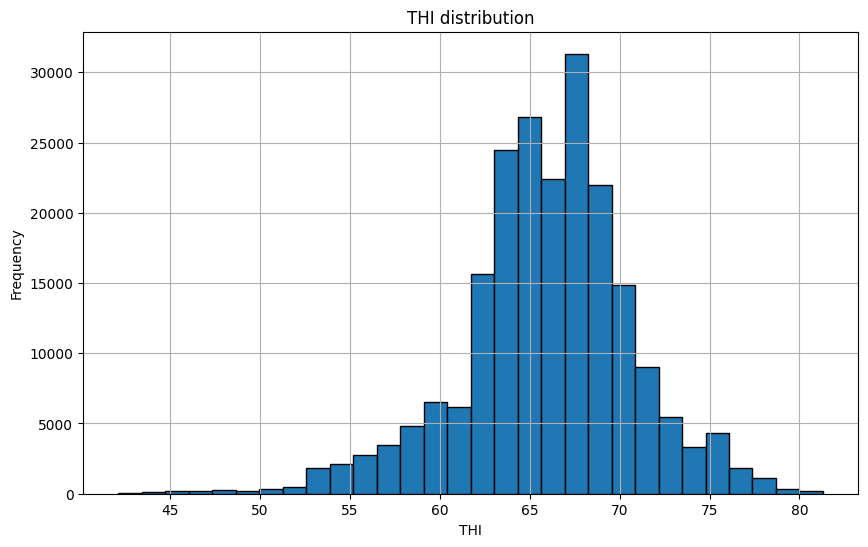

In [56]:
# 열의 분포를 히스토그램으로 시각화
plt.figure(figsize=(10, 6))
plt.hist(df_winter['불쾌지수'], bins=30, edgecolor='k')
plt.xlabel('THI')
plt.ylabel('Frequency')
plt.title('THI distribution')
plt.grid(True)
plt.show()

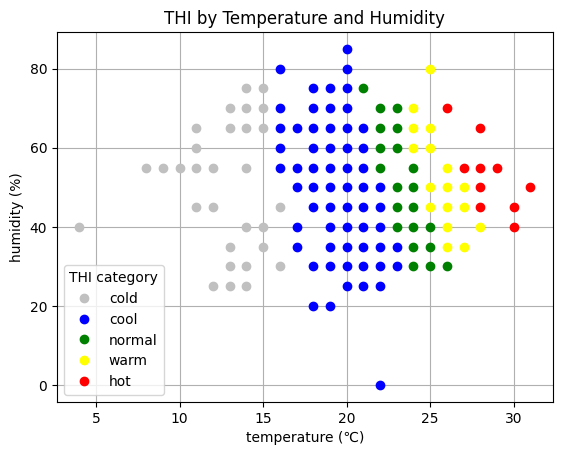

In [57]:
temperature = df_winter['운전석 온도']
humidity = df_winter['습도']

# temperature 열은 온도계 계측 8개 열 중 1개 사용/ 8개 열 : '운전석 온도', '보조석 온도', '뒷자석 온도(중앙)', '앞 루프 중앙', '앞 루프 좌측', '앞 루프 우측', '뒷 루프 좌측', '뒷 루프 우측'

temperature_points = range(int(temperature.min()), int(temperature.max()) + 1, 1)
humidity_points = range(int(humidity.min()), int(humidity.max()) + 1, 5)


# 불쾌지수 범주에 따른 색상 매핑
color_map = {'cold' : 'silver', 'cool': 'blue', 'normal': 'green', 'warm': 'yellow', 'hot': 'red'}

# 그래프 설정
fig, ax = plt.subplots()
ax.set_xlabel('temperature (℃)')
ax.set_ylabel('humidity (%)')
ax.set_title('THI by Temperature and Humidity')
# 불쾌지수 : Temperature Humidity Index, THI

# 각 온도와 습도 조합에 대해 점을 찍음
for temp in temperature_points:
    for hum in humidity_points:
        # 해당 온도와 습도에 가장 가까운 데이터 포인트 찾기
        subset = df_summer[(df_winter['운전석 온도'] == temp) & (df_winter['습도'] == hum)]
        
        if not subset.empty:
            category = subset['불쾌지수_범주'].values[0]
            color = color_map[category]
            ax.plot(temp, hum, 'o', color=color)  # 점의 색상 설정

for category, color in color_map.items():
    ax.plot([], [], 'o', color=color, label=category)

ax.legend(title='THI category')

plt.grid(True)
plt.show()